# Multi-Layer Perceptrons

이번 실습에서는 multi-layer perceptron을 이용하여 regression과 classification 문제를 풀어보겠습니다

In [1]:
## 필요한 Library들을 import 합니다
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## TensorFlow, Keras version 확인
print(tf.__version__)
print(keras.__version__)

2.2.0
2.3.0-tf


In [0]:
np.random.seed(777)
tf.random.set_seed(777)

## Coding Tips

#### 1. Hyper Paramter 정하기
#### 2. Data 준비(불러오기 or download 등)
#### 3. Dataset 구성 (tf.data.Dataset 이용)
#### 4. Modlel 만들기 (Neural Network model)
#### 5. Loss function 정의, Optimizer 선택
#### 6. Training (Train, Test function 만들기 포함)
#### 7. Validation(or Test) 결과 확인


## 1. Regression

 ### Boston Housing Dataset
 
 보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제입니다.
 - CRIM: 범죄율
 - ZN: 25,000 평방피트당 주거지역 비율
 - INDUS: 비소매 상업지구 비율
 - CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
 - NOX: 일산회질소 농도(단위: 0.1ppm)
 - RM: 주택당 방의 수
 - AGE: 1940년 이전에 건설된 주택의 비율
 - DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
 - RAD: 고속도로 접근성
 - TAX: 재산세율
 - PTRATIO: 학생/교사 비율
 - B: 흑인 비율
 - LSTAT: 하위 계층 비율
 
 예측해야하는 것
 - MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)

In [0]:
## Hyper-parameters
learning_rate = 0.001
N_EPOCHS = 200
N_BATCH = 32

In [0]:
## Load data
boston_housing = keras.datasets.boston_housing

In [5]:
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [6]:
train_X.shape, train_Y.shape

((404, 13), (404,))

In [7]:
test_X.shape, test_Y.shape

((102, 13), (102,))

In [8]:
## 첫번째 data의 속성 확인
train_X[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [9]:
## 첫번째 data의 정답
train_Y[0]

15.2

In [0]:
## Data preprocessing을 위한 normilzer
def Normalizer(data):
    mean = data.mean()
    std = data.std()
    data -= mean
    data /= std
    return data

In [0]:
## Data preprocessing
train_X = Normalizer(train_X)
train_Y = Normalizer(train_Y)
test_X = Normalizer(test_X)
test_Y = Normalizer(test_Y)

In [12]:
train_X[0]

array([-0.47482083, -0.48335641, -0.42698208, -0.48335641, -0.47963044,
       -0.44081941,  0.15172056, -0.45581402, -0.45565404,  1.64280094,
       -0.33791894,  2.26541184, -0.35370929])

In [13]:
train_Y[0]

-0.7821526033779157

In [0]:
## Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_X, train_Y)).shuffle(
                buffer_size=500).batch(N_BATCH, drop_remainder=True).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_X, test_Y)).batch(N_BATCH)

In [0]:
## Model function
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=32, activation='relu', input_shape=(13,)))
    model.add(keras.layers.Dense(units=16, activation='relu'))
    model.add(keras.layers.Dense(units=8, activation='relu'))
    model.add(keras.layers.Dense(units=1))
    return model

In [16]:
## Create model, compile & summary
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [17]:
## Parameters for training
steps_per_epoch = train_X.shape[0]//N_BATCH
validation_steps = int(np.ceil(test_X.shape[0]/N_BATCH))
print(steps_per_epoch, validation_steps)

12 4


In [18]:
## Training
history = model.fit(train_dataset, epochs=N_EPOCHS, steps_per_epoch=steps_per_epoch,
         validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/200
12/12 [==============================] - 0s 22ms/step - loss: 0.9761 - val_loss: 0.8915
Epoch 2/200
12/12 [==============================] - 0s 3ms/step - loss: 0.8232 - val_loss: 0.8172
Epoch 3/200
12/12 [==============================] - 0s 3ms/step - loss: 0.8285 - val_loss: 0.7670
Epoch 4/200
12/12 [==============================] - 0s 3ms/step - loss: 0.7761 - val_loss: 0.7341
Epoch 5/200
12/12 [==============================] - 0s 3ms/step - loss: 0.7584 - val_loss: 0.7145
Epoch 6/200
12/12 [==============================] - 0s 3ms/step - loss: 0.7649 - val_loss: 0.7044
Epoch 7/200
12/12 [==============================] - 0s 3ms/step - loss: 0.7311 - val_loss: 0.6972
Epoch 8/200
12/12 [==============================] - 0s 3ms/step - loss: 0.7699 - val_loss: 0.6904
Epoch 9/200
12/12 [==============================] - 0s 3ms/step - loss: 0.7636 - val_loss: 0.6888
Epoch 10/200
12/12 [==============================] - 0s 3ms/step - loss: 0.6919 - val_loss: 0.6867
Epoch 11

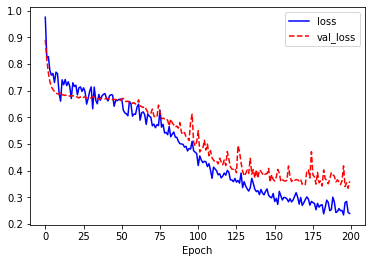

In [19]:
## Plot losses
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

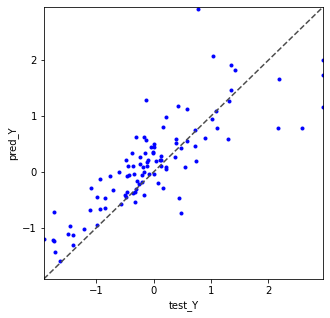

In [20]:
## Plot results
pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls='--', c='.3')
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

## 2. Classification

### Fashion MNIST(MNIST) Dataset

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋을 사용하겠습니다. 이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 옷 품목을 나타냅니다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

패션 MNIST는 컴퓨터 비전 분야의 "Hello, World" 프로그램격인 고전 [MNIST](http://yann.lecun.com/exdb/mnist/) 데이터셋을 대신해서 자주 사용됩니다. MNIST 데이터셋은 손글씨 숫자(0, 1, 2 등)의 이미지로 이루어져 있습니다. 여기서 사용하려는 옷 이미지와 동일한 포맷입니다.

패션 MNIST는 일반적인 MNIST 보다 조금 더 어려운 문제이고 다양한 예제를 만들기 위해 선택했습니다. 두 데이터셋은 비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용되곤 합니다. 코드를 테스트하고 디버깅하는 용도로 좋습니다.

네트워크를 훈련하는데 60,000개의 이미지를 사용합니다. 그다음 네트워크가 얼마나 정확하게 이미지를 분류하는지 10,000개의 이미지로 평가하겠습니다. 패션 MNIST 데이터셋은 텐서플로에서 바로 임포트하여 적재할 수 있습니다:

이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이입니다. *레이블*(label)은 0에서 9까지의 정수 배열입니다. 이 값은 이미지에 있는 옷의 *클래스*(class)를 나타냅니다:

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있습니다. 데이터셋에 *클래스 이름*이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장합니다

In [0]:
## Hyper-parameters
learning_rate = 0.001
N_EPOCHS = 30
N_BATCH = 100
N_CLASS = 10

In [0]:
## MNIST Dataset #########################################################
#mnist = keras.datasets.mnist
#class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
mnist = keras.datasets.fashion_mnist
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

In [23]:
## MNIST dataset load
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

4423680/4422102 [==============================] - 0s 0us/step


In [24]:
## train_images, train_labels의 shape 확인
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [25]:
## test_images, test_labels의 shape 확인
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [26]:
## training set의 각 class 별 image 수 확인
unique, counts = np.unique(train_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [27]:
## test set의 각 class 별 image 수 확인
unique, counts = np.unique(test_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

In [0]:
N_TRAIN = train_images.shape[0]
N_TEST = test_images.shape[0]

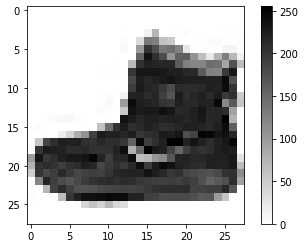

In [29]:
## train_images의 0번 image 화면에 출력
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

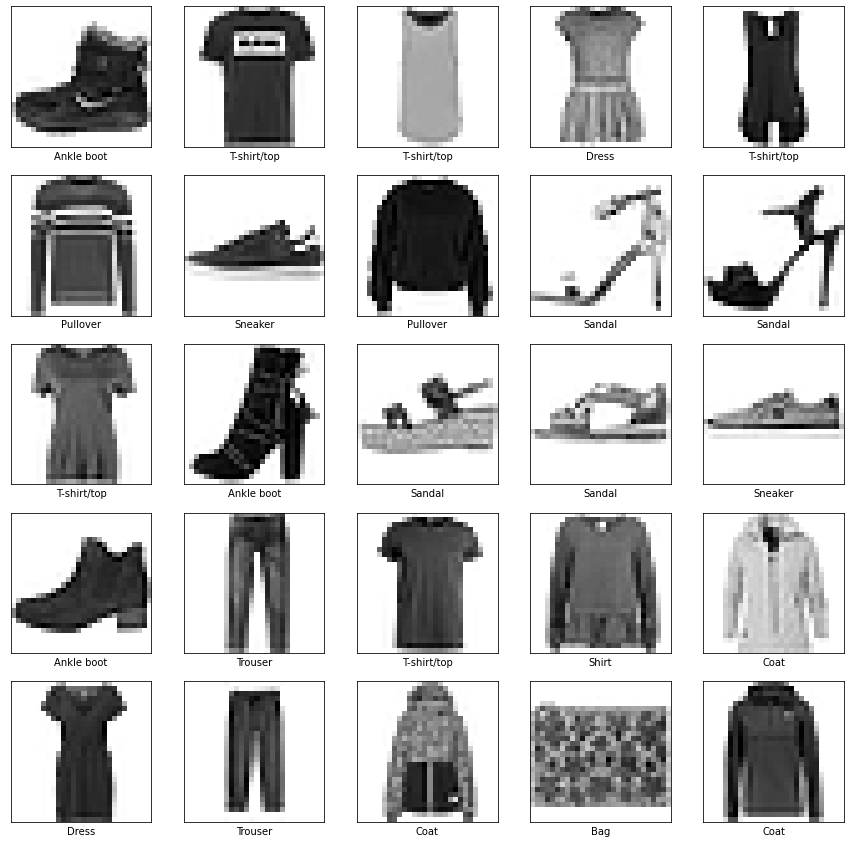

In [30]:
## 25개의 train image와 label 화면에 출력
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [0]:
## image를 0~1사이 값으로 만들기 위하여 255로 나누어줌
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

## one-hot encoding
train_labels = keras.utils.to_categorical(train_labels, N_CLASS)
test_labels = keras.utils.to_categorical(test_labels, N_CLASS)

In [0]:
## dataset 구성    
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(N_BATCH).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(N_BATCH)

In [0]:
## model function
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [34]:
## Create model, compile & summary
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [35]:
## Parameters for training
steps_per_epoch = N_TRAIN//N_BATCH
validation_steps = N_TEST//N_BATCH
print(steps_per_epoch, validation_steps)

600 100


In [36]:
## Training
history = model.fit(train_dataset, epochs=N_EPOCHS, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/30
600/600 [==============================] - 2s 4ms/step - loss: 0.5011 - accuracy: 0.8233 - val_loss: 0.4302 - val_accuracy: 0.8481
Epoch 2/30
600/600 [==============================] - 2s 4ms/step - loss: 0.3639 - accuracy: 0.8686 - val_loss: 0.3815 - val_accuracy: 0.8634
Epoch 3/30
600/600 [==============================] - 2s 4ms/step - loss: 0.3249 - accuracy: 0.8797 - val_loss: 0.3585 - val_accuracy: 0.8713
Epoch 4/30
600/600 [==============================] - 2s 4ms/step - loss: 0.3017 - accuracy: 0.8871 - val_loss: 0.3605 - val_accuracy: 0.8734
Epoch 5/30
600/600 [==============================] - 2s 4ms/step - loss: 0.2843 - accuracy: 0.8937 - val_loss: 0.3513 - val_accuracy: 0.8772
Epoch 6/30
600/600 [==============================] - 2s 4ms/step - loss: 0.2685 - accuracy: 0.8995 - val_loss: 0.3548 - val_accuracy: 0.8728
Epoch 7/30
600/600 [==============================] - 2s 4ms/step - loss: 0.2570 - accuracy: 0.9033 - val_loss: 0.3239 - val_accuracy: 0.8846
Epoch 

In [37]:
model.evaluate(test_dataset)

100/100 [==============================] - 0s 3ms/step - loss: 0.3947 - accuracy: 0.8950


[0.39466702938079834, 0.8949999809265137]

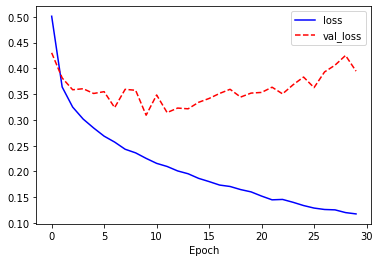

In [38]:
## Plot losses
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

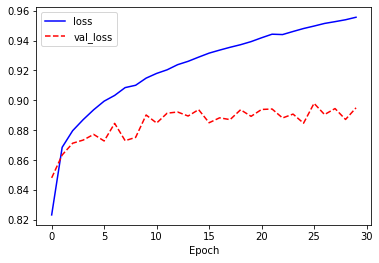

In [39]:
## Plot losses
plt.plot(history.history['accuracy'], 'b-', label='loss')
plt.plot(history.history['val_accuracy'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [0]:
## 결과 확인
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img,cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(N_CLASS), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(N_CLASS), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

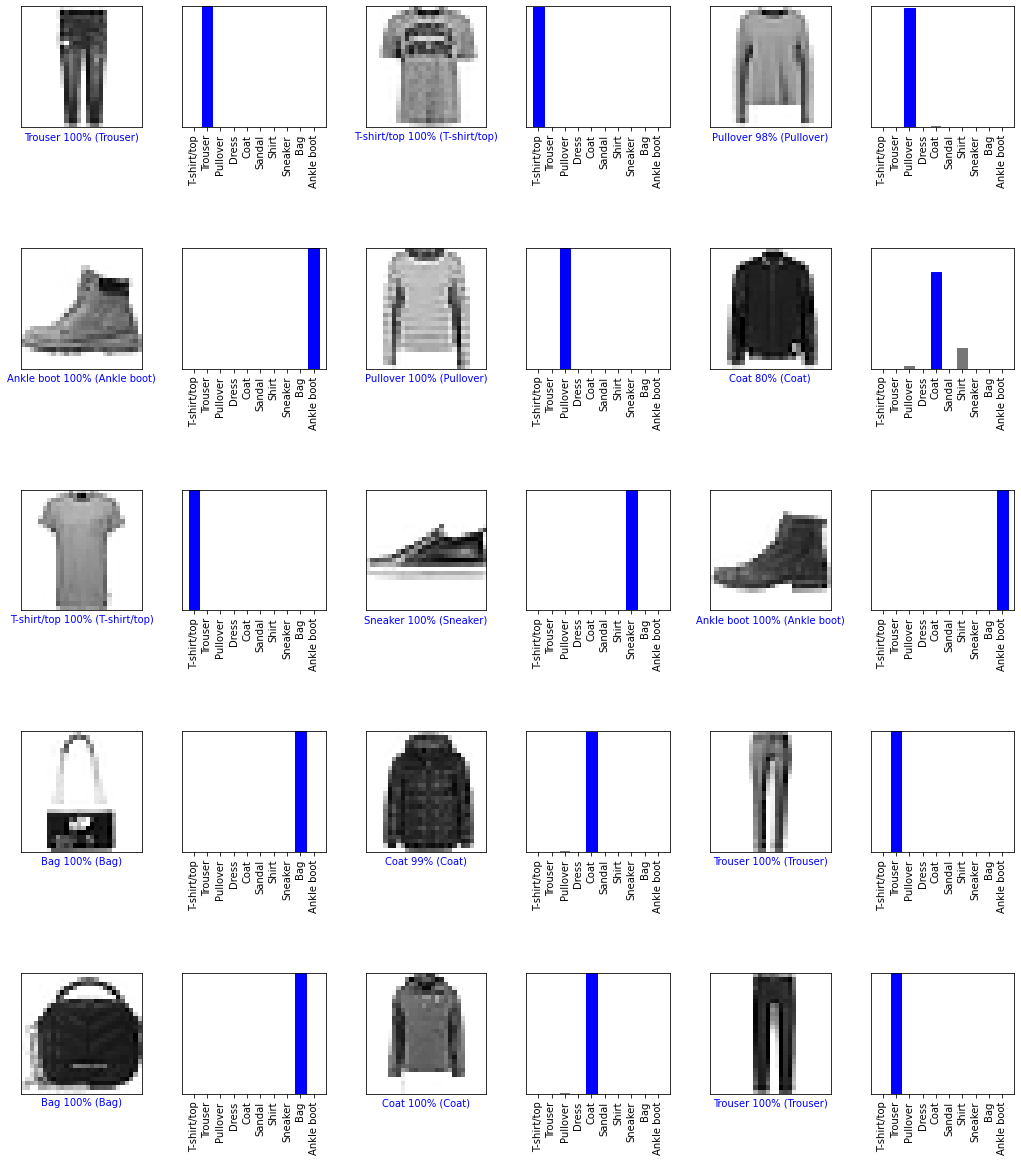

In [41]:
rnd_idx = np.random.randint(1, N_TEST//N_BATCH)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break